In [1]:
# load packages
using Cascadia
using Gumbo
using Requests
using Plots
using StatsBase

# set basic variables
max_pages = 42            # number of pages
filmnames = []  # array of film names
filmratings = [] # array of film ratings
filmurls = []     # array of film reviews urls

for i = 1:max_pages
    # get every page
    page = get(string("https://kultura.zpravy.idnes.cz/recenze-mirky-spacilove.aspx?strana=",i))
    page_html = parsehtml(convert(String, page.data))
    
    # film names and ratings
    for element in matchall(Selector(".rec-box"),page_html.root)
        push!(filmnames, strip(split(nodeText(element),"%")[2]))
        push!(filmratings, parse(Int,strip(split(nodeText(element),"%")[1])))
    end
    
    # reviews urls
    for element in matchall(Selector(".art > a"),page_html.root)
        push!(filmurls, element.attributes["href"])
    end
    
end

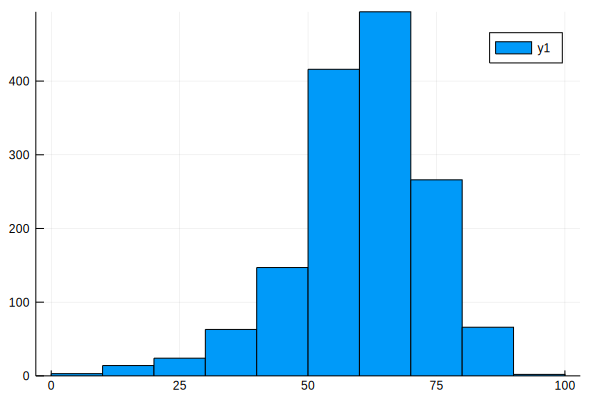

In [2]:
histogram(filmratings, bins=10)

In [3]:
writecsv("reviews.csv", [filmnames filmratings filmurls])

In [4]:
countmap(filmratings)

Dict{Any,Int64} with 19 entries:
  50 => 269
  80 => 62
  40 => 105
  85 => 4
  0  => 1
  75 => 56
  60 => 331
  55 => 147
  25 => 13
  35 => 26
  10 => 9
  65 => 163
  5  => 2
  90 => 2
  45 => 42
  20 => 11
  70 => 210
  15 => 5
  30 => 37